# Machine Learning Essentials SS25 - Exercise Sheet 4

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

### Task 2

In [48]:
# TODO: Define the needed helper functions
def tanh_prime(x_activated):
    return 1 - np.power(x_activated, 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_hat, y):
    """
    Computes the BCE loss over samples.
    """
    # Hint: Add a small epsilon to y_hat to prevent numerical issues w/ log(0) issues (that's common practice in these cases)
    epsilon = 1e-8
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

In [52]:
# MLP Class
class MLP:
    def __init__(self, layer_dims, initialization_scale=1):
        """
        Initializes the multi-layer perceptron.
        Args:
            layer_dims (list of int): List containing the number of neurons in each layer.
                                      [d0, d1, d2] = [2, 10, 1] for the exercise.
                                      d0: input dimension
                                      d1: hidden layer dimension
                                      d2: output dimension
            initialization_scale (float): Scaling factor for weight initialization (i.e. standard deviation of the normal distribution)
        """
        self.parameters = {}
        self.num_layers = len(layer_dims) 

        # Weights are initialized by drawing from a standard normal distribution, biases are initialized as zero.
        # For more complex networks, one usually uses techniques like Xavier or He initialization. Play around with the initialization_scale parameter to see how it affects the training!
        # Layer 0 -> Layer 1
        self.parameters['W0'] = np.random.randn(layer_dims[1], layer_dims[0]) * initialization_scale 
        self.parameters['b0'] = np.zeros((layer_dims[1], 1))
        # Layer 1 -> Layer 2
        self.parameters['W1'] = np.random.randn(layer_dims[2], layer_dims[1]) * initialization_scale
        self.parameters['b1'] = np.zeros((layer_dims[2], 1))
        
        self.cache = {} # For storing intermediate values (needed for backprop)

    def forward(self, X_batch):
        """
        Forward pass through the network. Store intermediate values in self.cache for backward pass.
        """
        # TODO: Implement the forward pass & store the needed values in self.cache
        z_1 = np.tanh(np.dot(self.parameters['W0'], X_batch.T) + self.parameters['b0'])
        y_hat = sigmoid(np.dot(self.parameters['W1'], z_1) + self.parameters['b1'])
        y_hat = y_hat.T
        self.cache['X_batch'] = X_batch
        self.cache['z_1'] = z_1
        self.cache['y_hat'] = y_hat

        return y_hat

    def backward(self, Y_batch):
        """
        Performs the backward pass (= backpropagation) to compute gradients of the loss with respect to the parameters.
        Gradients are stored in the grads dictionary (see update_params method).
        """
        # TODO: Implement the backward pass
        num_sam = Y_batch.shape[0]
        X_batch = self.cache['X_batch']
        z_1 = self.cache['z_1']
        y_hat = self.cache['y_hat']

        del2 = y_hat - Y_batch
        dW1 = (1 / num_sam) * np.dot(del2.T, z_1.T)
        db1 = (1 / num_sam) * np.sum(del2, axis=0, keepdims=True).T

        del1 = np.dot(self.parameters['W1'].T, del2.T) * tanh_prime(z_1)
        dW0 = (1 / num_sam) * np.dot(del1, X_batch)
        db0 = (1 / num_sam) * np.sum(del1, axis=1, keepdims=True)
        grads = {
        'dW0': dW0,
        'db0': db0,
        'dW1': dW1,
        'db1': db1
        }

        return grads

    def update_params(self, grads, learning_rate):
        """
        Updates the parameters using gradient descent.
        Args:
            grads (dict): Dictionary of gradients.
            learning_rate (float): The learning rate.
        """
        self.parameters['W0'] -= learning_rate * grads['dW0']
        self.parameters['b0'] -= learning_rate * grads['db0']
        self.parameters['W1'] -= learning_rate * grads['dW1']
        self.parameters['b1'] -= learning_rate * grads['db1']

### Task 3
TODO: Explain why using vectorized operations is generally preferred in ML.

Vectorized operations let us process many data points at once, which is much faster than looping through them one by one. This helps speed up training and makes the code more efficient in machine learning.

### Task 4

In [53]:
#Data loading and preprocessing (predefined)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# NOTE: Different libraries/languages use different conventions for the shape of the data matrix X, which comes from the way they store data in memory:
#   - In ML textbooks/mathematical notation, X is often (n_features, n_samples), because each sample is a (n_features, 1) column vector and we stack them "horizontally".
#   - This is consistent with some languages (e.g. Julia, Matlab), which store data in column-major order.
#   - However, most ML code (e.g. NumPy, sklearn, Pytorch) is optimized for row-major order, so you will in code most often see data matrices of shape (n_samples, n_features).
#     (The reason for that is that most of these libraries run C/C++/CUDA code under the hood, which is optimized for row-major order)
# --> Juggling the shapes of arrays to be correctly aligned with the used model implementation / convention is a day-to-day task in practical ML and the cause of many bugs, so always double-check the expected format.

# TODO: The MLP class you're using expects its inputs in a specific shape, make sure your X and y match that convention.
print(f"Shape of X_train: {X_train.shape}") 
print(f"Shape of y_train: {y_train.shape}") 
print(f"Shape of X_test: {X_test.shape}") 
print(f"Shape of y_test: {y_test.shape}")

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Shape of X_train: (350, 2)
Shape of y_train: (350,)
Shape of X_test: (150, 2)
Shape of y_test: (150,)


Epoch 1000/100000 - Training Loss: 0.1045
Epoch 2000/100000 - Training Loss: 0.0718
Epoch 3000/100000 - Training Loss: 0.0625
Epoch 4000/100000 - Training Loss: 0.0573
Epoch 5000/100000 - Training Loss: 0.0540
Epoch 6000/100000 - Training Loss: 0.0518
Epoch 7000/100000 - Training Loss: 0.0500
Epoch 8000/100000 - Training Loss: 0.0480
Epoch 9000/100000 - Training Loss: 0.0452
Epoch 10000/100000 - Training Loss: 0.0422
Epoch 11000/100000 - Training Loss: 0.0398
Epoch 12000/100000 - Training Loss: 0.0379
Epoch 13000/100000 - Training Loss: 0.0364
Epoch 14000/100000 - Training Loss: 0.0352
Epoch 15000/100000 - Training Loss: 0.0342
Epoch 16000/100000 - Training Loss: 0.0333
Epoch 17000/100000 - Training Loss: 0.0325
Epoch 18000/100000 - Training Loss: 0.0318
Epoch 19000/100000 - Training Loss: 0.0311
Epoch 20000/100000 - Training Loss: 0.0305
Epoch 21000/100000 - Training Loss: 0.0300
Epoch 22000/100000 - Training Loss: 0.0295
Epoch 23000/100000 - Training Loss: 0.0291
Epoch 24000/100000 -

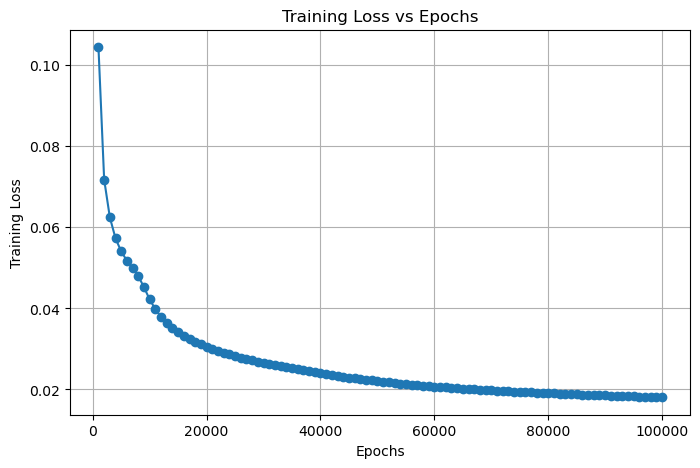

In [54]:
# Training
layer_dimensions = [X_train.shape[1], 10, 1] # d0, d1, d2 as given in the exercise
mlp = MLP(layer_dimensions) # Initialize the MLP

# Hyperparameters
learning_rate = 0.3 # TODO: Experiment with this
num_epochs = 100000 # TODO: Experiment with this
print_loss = 1000 # To monitor the training process, print the loss every few epochs
train_losses = []

for epoch in range(1,num_epochs+1):
    # Forward pass
    y_hat_train = mlp.forward(X_train)
    # Compute loss
    train_loss = binary_cross_entropy(y_hat_train, y_train)
    # Backward pass = backprop
    grads = mlp.backward(y_train)
   # Update parameters by gradient descent
    mlp.update_params(grads, learning_rate)
    
    if epoch % print_loss == 0 or epoch == num_epochs:
       train_losses.append(train_loss)
       print(f"Epoch {epoch}/{num_epochs} - Training Loss: {train_loss:.4f}")

epochs_recorded = np.arange(1, len(train_losses) + 1) * print_loss

plt.figure(figsize=(8, 5))
plt.plot(epochs_recorded, train_losses, marker='o', linestyle='-')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [59]:
# Evaluation 
# TODO: Compute the accuracy on the test set and plot the decision boundary over the test set, comment on the performance

y_hat_test = mlp.forward(X_test)

y_pred_test = (y_hat_test >= 0.5).astype(int)
test_accuracy = np.mean(y_pred_test == y_test)
print(f"Test Accuracy: {test_accuracy * 100}%")


Test Accuracy: 96.0%


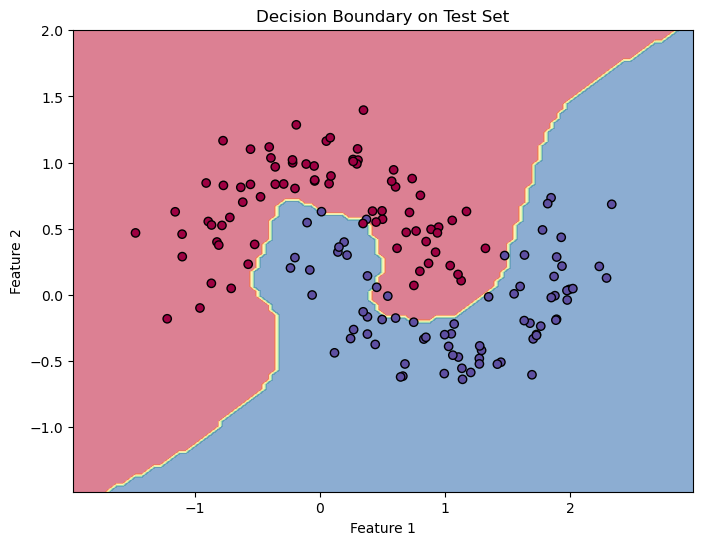

In [ ]:
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

y_hat_grid = mlp.forward(grid)
y_pred_grid = (y_hat_grid >= 0.5).astype(int)
Z = y_pred_grid.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), edgecolors='k', cmap=plt.cm.Spectral)
plt.title('Decision Boundary on Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()